## Lecture-03 Gradient Descent and Dymanic Programming

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

### Part I Review the online programming. 

####  装饰器

In [4]:
def example(f,arg):
    return f(arg)

In [5]:
def add_five(x):
    return x+5

In [6]:
example(add_five, 100)

105

In [7]:
def add_fif(y):
    return y+15

In [9]:
operation = [add_five,add_fif]

In [10]:
for f in operation:
    print(example(f,100))

105
115


In [34]:
def function1(): print('I am fuction one')

In [35]:
from collections import defaultdict

In [47]:
called_time = defaultdict(int)
def get_call_times(f):
    result = f( )
    print('function:{} was called once'.format(f.__name__) )
    called_time[f.__name__] +=1
    return result


In [48]:
get_call_times(function1)

I am fuction one
function:function1 was called once


In [51]:
called_time_with_arg = defaultdict(int)
def r(n):
    fname = r.__name__
    called_time_with_arg[(fname,n)] += 1
    print('the function {} with argument {} was called {} times'.format(fname,n, called_time_with_arg[(fname,n)]))


In [54]:
r(10)
r(10)
r(1)
r(2)
r(1)
r(1)

the function r with argument 10 was called 4 times
the function r with argument 10 was called 5 times
the function r with argument 1 was called 1 times
the function r with argument 2 was called 1 times
the function r with argument 1 was called 2 times
the function r with argument 1 was called 3 times


In [ ]:
##  more advance

In [77]:
called_time_with_arg = defaultdict(int)
def get_call_time(f):
    ''' 
    haha, I am f
    
    '''
    def wrap(n):
        '''
        haha, I am wrape
        '''
        result = f(n)
        fname = f.__name__
        called_time_with_arg[(f.__name__,n)] +=1
        print('the function {} with argument {} was called {} times'.format(fname,n, called_time_with_arg[(fname,n)]))
        return result
    return wrap

In [78]:
add_five_with_call_time = get_call_time(add_five)

In [79]:
add_five_with_call_time(10)
add_five_with_call_time(10)
add_five_with_call_time(5)
called_time_with_arg

the function add_five with argument 10 was called 1 times
the function add_five with argument 10 was called 2 times
the function add_five with argument 5 was called 1 times


defaultdict(int, {('add_five', 5): 1, ('add_five', 10): 2})

### simpified the mutiple fuction

In [80]:
@get_call_time
def add_two(n):
    ''' 
    haha, I am funtion add-two
    
    '''
    return n+2

In [69]:
add_two(8)
add_two(9)
add_two(8)
called_time_with_arg

the function add_two with argument 8 was called 4 times
the function add_two with argument 9 was called 3 times
the function add_two with argument 8 was called 5 times


defaultdict(int,
            {('add_five', 5): 2,
             ('add_five', 10): 4,
             ('add_two', 8): 5,
             ('add_two', 9): 3})

In [ ]:
# use wrape and direct function name, help information change

In [81]:
help(add_two) #changed to wrap

Help on function wrap in module __main__:

wrap(n)
    haha, I am wrape



### solution is wrapes package, @wraps

In [92]:
from functools import wraps

In [93]:
called_time_with_arg = defaultdict(int)
def get_call_time(f):
    ''' 
    haha, I am f
    
    '''
    @wraps(f)
    def wrap(n):
        '''
        haha, I am wrape
        '''
        result = f(n)
        fname = f.__name__
        called_time_with_arg[(f.__name__,n)] +=1
        print('the function {} with argument {} was called {} times'.format(fname,n, called_time_with_arg[(fname,n)]))
        return result
    return wrap

In [94]:
@get_call_time
def add_two(n):
    ''' 
    haha, I am funtion add-two
    
    '''
    return n+2

In [95]:
help(add_two)

Help on function add_two in module __main__:

add_two(n)
    haha, I am funtion add-two



### save those have been changed by deraction

In [101]:
def memo(f):
    already_computed = {}
    @wraps(f)
    def _wrap(arg):
        result = None
        if arg in already_computed:
            result = already_computed[arg]
        else:
            result = f(arg)
            already_computed[arg] = result
        return result
    return _wrap

In [102]:
@memo
@get_call_time
def add_two(n):
    ''' 
    haha, I am funtion add-two
    
    '''
    return n+2

In [103]:
add_two(3)

the function add_two with argument 3 was called 1 times


5

In [104]:
add_two(3)

5

'the function add_two with argument 3 was called 1' times was not printed, mean that it was not computed again'

In [105]:
add_two(3)


5

In [106]:
add_two(2)

the function add_two with argument 2 was called 1 times


4

### application decoration for dynamix´c programming for cuuting problems

In [109]:
from collections import defaultdict

In [110]:
original_price = [1,5,8,9,10,17,17,20,24,30]

In [111]:
price = defaultdict(int)
for i,p in enumerate(original_price):
    price[i+1] = p
assert price[1] == 1

In [112]:
price

defaultdict(int,
            {1: 1,
             2: 5,
             3: 8,
             4: 9,
             5: 10,
             6: 17,
             7: 17,
             8: 20,
             9: 24,
             10: 30})

#### set basic function for price

In [152]:
@memo
def r(n):  
    max_price, split_point = max([(price[n], 0)] + [(r(i)+r(n-i),i) for i in range(1,n)], key=lambda x: x[0])
    solution[n] = (split_point, n- split_point)
    return max_price

In [144]:
def memo(func):
    already_computed = {}
    @wraps(func)
    def _wrap(n):
        if n in already_computed:
            result = already_computed[n]
        else:
            result = func(n)
            already_computed[n] = result
        return result
    return _wrap

In [149]:
call_times_with_arg = defaultdict(int)
def get_call_time(f): 
    fname = f.__name__
    @wraps(f)
    def _inner(n):
        call_times_with_arg[(fname,n)] +=1
        result = f(n)
        print('the function {} with argument {} was called {} times'.format(fname,n, called_time_with_arg[(fname,n)]))
        return result
    return _inner

In [139]:
solution = {}

In [124]:
import time
def call_time(f,arg):
    start_time = time.time()
    result = f(arg)
    time_used = time.time()-start_time
    print('the time used is {}'.format(time_used))
    return result

In [125]:
call_time(add_two,100)

the time used is 0.0


102

In [163]:
r(500)

1500

In [155]:
def not_cut(split): return split == 0

In [160]:
def parse_solution(target_length, revenue_solution):
    left,right = revenue_solution[target_length]
    if int(left) == 0: return [right]
    return parse_solution(left,revenue_solution) +  parse_solution(right, revenue_solution)

In [164]:
parse_solution(30,solution)

[10, 10, 10]

### Part 2: change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.

In [165]:
def partial_k_2(x,y,y_hat):
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        if y_i> y_hat_i:
            gradient += (-x_i)
        else:
            gradient += x_i
    return 1/n*gradient

In [166]:
def partial_b_2(y,y_hat):
    n = len(y)
    gradient = 0
    for  y_i, y_hat_i in zip(list(y), list(y_hat)):
        if y_i> y_hat_i:
            gradient += -1
        else:
            gradient += 1
    return 1/n*gradient

In [181]:
def price(rm, k, b):
    return k*rm + b

In [182]:
def loss(y,y_hat):
    return sum((y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

In [183]:
from sklearn.datasets import load_boston

In [184]:
data = load_boston()

In [185]:
%matplotlib inline
import random
from collections import defaultdict
def draw_rm_and_price():
    plt.scatter(X[:,5],y)
import matplotlib.pyplot as plt

In [186]:
trying_times = 2000
X,y = data['data'], data['target']
min_loss = float('inf')
current_k = random.random()*200 - 100
current_b = random.random()*200 - 100
learning_rate = 1e-04
X_rm = X[:,5]

update_time = 0

for i in range(trying_times):
    price_by_k_and_b = [price(r,current_k, current_b) for r in X_rm]
    current_loss = loss(y,price_by_k_and_b)
    if current_loss < min_loss:
        min_loss = current_loss
        if i % 50 == 0:
            print('when time is : {}, get best_k:{} best_b {}, and the loss is {}'.format(i, current_k, current_b, min_loss))
    k_gradient = partial_k_2(X_rm,y,price_by_k_and_b)
    b_gradient = partial_b_2(y,price_by_k_and_b)
    current_k = current_k + (-1*k_gradient)*learning_rate
    current_b = current_b + (-1*b_gradient)*learning_rate

when time is : 0, get best_k:-87.40997332294624 best_b -42.738398431104365, and the loss is 614.6109288981049
when time is : 50, get best_k:-87.37855015100975 best_b -42.7333984311042, and the loss is 614.408445751193
when time is : 100, get best_k:-87.34712697907325 best_b -42.72839843110403, and the loss is 614.2059626042806
when time is : 150, get best_k:-87.31570380713676 best_b -42.72339843110387, and the loss is 614.0034794573687
when time is : 200, get best_k:-87.28428063520026 best_b -42.7183984311037, and the loss is 613.8009963104573
when time is : 250, get best_k:-87.25285746326377 best_b -42.713398431103535, and the loss is 613.5985131635454
when time is : 300, get best_k:-87.22143429132727 best_b -42.70839843110337, and the loss is 613.396030016633
when time is : 350, get best_k:-87.19001111939077 best_b -42.7033984311032, and the loss is 613.1935468697211
when time is : 400, get best_k:-87.15858794745428 best_b -42.69839843110304, and the loss is 612.9910637228089
when ti

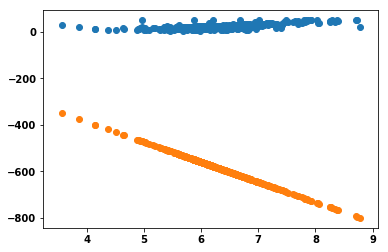

In [188]:
k = -86.18446961742292
b = -42.54339843109789
price_by_best_k_annd_b = [price(r, k, b) for r in X_rm]
draw_rm_and_price()
plt.scatter(X_rm, price_by_best_k_annd_b)

### Part 3: Finish the Solution Parse Part of Edit-Distance

In [191]:
solution = {}

In [200]:
def lru_cache(f,maxsize = 2**10):
    cach = {}
    @wraps(f)
    def _wraps_inner(string1,string2):
        if len(string1) > maxsize or len(string2) > maxsize:
            return None
        else:
            if (string1,string2) in cach:
                result = cach[(string1, string2)]
            else:
                result = f(string1,string2)
            return result
    return _wraps_inner

In [207]:
@lru_cache
def edit_distance(string1,string2):
    if len(string1)== 0: return len(string2)
    if len(string2)== 0: return len(string1)
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    candidates = [
        (edit_distance(string1[:-1],string2)+1, 'del {}'.format(tail_s1))
        ,(edit_distance(string1, string2[:-1])+1, 'add {}'.format(tail_s2))
    ]
    
    if tail_s1 == tail_s2:
        both_forward = (edit_distance( string1[:-1],string2[:-1])+0, '')
    else:
        both_forward = (edit_distance( string1[:-1],string2[:-1])+1, 'sub {} => {}'.format(tail_s1,tail_s2))
        
    candidates.append(both_forward)
    
    min_distance, operation = min(candidates,key = lambda x:x[0])
    solution[(string1,string2)] = (min_distance,operation)
    return min_distance

    

In [208]:
edit_distance('ABrE', 'ABtr')
solution

{('A', 'A'): (0, ''),
 ('A', 'AB'): (1, 'add B'),
 ('A', 'ABt'): (2, 'add t'),
 ('A', 'ABtr'): (3, 'add r'),
 ('AB', 'A'): (1, 'del B'),
 ('AB', 'AB'): (0, ''),
 ('AB', 'ABt'): (1, 'add t'),
 ('AB', 'ABtr'): (2, 'add r'),
 ('ABr', 'A'): (2, 'del r'),
 ('ABr', 'AB'): (1, 'del r'),
 ('ABr', 'ABt'): (1, 'sub r => t'),
 ('ABr', 'ABtr'): (1, ''),
 ('ABrE', 'A'): (3, 'del E'),
 ('ABrE', 'AB'): (2, 'del E'),
 ('ABrE', 'ABt'): (2, 'del E'),
 ('ABrE', 'ABtr'): (2, 'del E'),
 ('y', 'w'): 1,
 ('y', 'wa'): 2,
 ('y', 'wan'): 3,
 ('y', 'wang'): 4,
 ('y', 'wangy'): 4,
 ('y', 'wangyi'): 5,
 ('y', 'wangyin'): 6,
 ('y', 'wangyiny'): 7,
 ('y', 'wangyinyi'): 8,
 ('y', 'wangyinyin'): 9,
 ('yi', 'w'): 2,
 ('yi', 'wa'): 2,
 ('yi', 'wan'): 3,
 ('yi', 'wang'): 4,
 ('yi', 'wangy'): 5,
 ('yi', 'wangyi'): 4,
 ('yi', 'wangyin'): 5,
 ('yi', 'wangyiny'): 6,
 ('yi', 'wangyinyi'): 7,
 ('yi', 'wangyinyin'): 8,
 ('yin', 'w'): 3,
 ('yin', 'wa'): 3,
 ('yin', 'wan'): 2,
 ('yin', 'wang'): 3,
 ('yin', 'wangy'): 4,
 ('yin', '

In [209]:
edit_distance('yinwang', 'wangyinyin')
solution

{('A', 'A'): (0, ''),
 ('A', 'AB'): (1, 'add B'),
 ('A', 'ABt'): (2, 'add t'),
 ('A', 'ABtr'): (3, 'add r'),
 ('AB', 'A'): (1, 'del B'),
 ('AB', 'AB'): (0, ''),
 ('AB', 'ABt'): (1, 'add t'),
 ('AB', 'ABtr'): (2, 'add r'),
 ('ABr', 'A'): (2, 'del r'),
 ('ABr', 'AB'): (1, 'del r'),
 ('ABr', 'ABt'): (1, 'sub r => t'),
 ('ABr', 'ABtr'): (1, ''),
 ('ABrE', 'A'): (3, 'del E'),
 ('ABrE', 'AB'): (2, 'del E'),
 ('ABrE', 'ABt'): (2, 'del E'),
 ('ABrE', 'ABtr'): (2, 'del E'),
 ('y', 'w'): (1, 'sub y => w'),
 ('y', 'wa'): (2, 'add a'),
 ('y', 'wan'): (3, 'add n'),
 ('y', 'wang'): (4, 'add g'),
 ('y', 'wangy'): (4, ''),
 ('y', 'wangyi'): (5, 'add i'),
 ('y', 'wangyin'): (6, 'add n'),
 ('y', 'wangyiny'): (7, 'add y'),
 ('y', 'wangyinyi'): (8, 'add i'),
 ('y', 'wangyinyin'): (9, 'add n'),
 ('yi', 'w'): (2, 'del i'),
 ('yi', 'wa'): (2, 'sub i => a'),
 ('yi', 'wan'): (3, 'add n'),
 ('yi', 'wang'): (4, 'add g'),
 ('yi', 'wangy'): (5, 'del i'),
 ('yi', 'wangyi'): (4, ''),
 ('yi', 'wangyin'): (5, 'add n')

### Part 4 Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 
+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Code Complete 2 
+ Programming Pearls 
+ Deep Learning
+ 黑客与画家
+ 数学之美
+ Fluent Python
+ Hands on Tensorflow
+ Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

> most books you may find in our github: https://github.com/Computing-Intelligence/References

## Part 5-1: review machine learning

1. Why do we use Derivative / Gredient to fit a target function?¶

Ans: It can tell us the right direction of parameter change to supervise the model setting process.

2. In the words 'Gredient Descent', what's the Gredient and what's the Descent?¶

Ans:Gredient is the how much we change every time. Descent means that we always choose the good direction that can make the loss become smaller. If loss increase, we went to same direction. Otherwise, we went to the other direction.¶


3. What's the advantages of the 3rd gradient descent method compared to the previous methods?

 Ans: It can get the best one more quick as we can use patial to control the direction.

4. Using the simple words to describe: What's the machine leanring.¶

Ans:building models from sample data in order to automate decision-making processes based on data inputs

### Part 5: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

Ans: dynamic programming can avoid unnessary calculation. There is a cache which install the computed value. When faced with same calculation, we just need to use the result directly. This will save a lot of time.
While for search, we need consider all the situations again without know whether it have existent or not. This search method will cost a lot of time.

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

This method avoid large calculation and can give direction of function parameters change based one the trend of previous input data.

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

google map, the houshold leaning robot, delivery route

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

4.1. the automatic spelling correction system of micor word system.
4.2. find matches for short strings in many longer texts.
4.3. get the most similar protein sequence.

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

5.1 save cache, avoid repeat calculation
5.2 Every subproblem you solve involves a decision
5.3 we can know the whole decision process

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

6.1 Dividing problem in sub problem and storing inter mediate results consumes memory.
6.2 every problem has to be solving in its own way.

## Part 6 Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

### (Optinal) Finish the k-person-salesman problem:

In [2]:
import random
import matplotlib.pylab as plt

In [3]:
latitudes = [random.randint(-100, 100) for _ in range(15)]
longitude = [random.randint(-100, 100) for _ in range(15)]

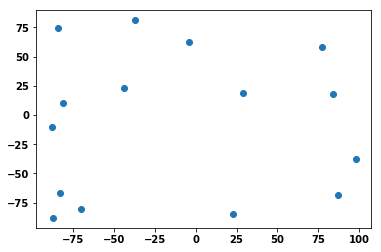

In [4]:
plt.scatter(latitudes, longitude)

给定一个初始点 𝑃, 已经 𝑘个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短?

例如：

In [6]:
import matplotlib.pyplot as plt

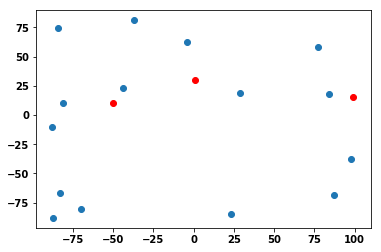

In [7]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
plt.scatter([chosen_p2[0]], [chosen_p2[1]], color='r')
plt.scatter([chosen_p3[0]], [chosen_p3[1]], color='r')

shuro

In [8]:
point_dict = {}
for point_order, position in enumerate(zip(list(latitudes),list(longitude))):
    point_dict[point_order] = position
    

In [119]:
point_dict

{0: (87, -68),
 1: (29, 19),
 10: (-88, -10),
 11: (23, -85),
 12: (-84, 74),
 13: (-37, 81),
 14: (77, 58),
 2: (-81, 10),
 3: (-87, -88),
 4: (-83, -67),
 5: (-44, 23),
 6: (-4, 62),
 7: (-70, -80),
 8: (84, 18),
 9: (98, -38),
 'chosen_p': (-50, 10)}

In [207]:
# add name for figure point
def draw_figure(point_dict):
    fig, ax = plt.subplots()
    #ax.scatter(latitudes, longitude )
    for i,j in point_dict.items():
        plt.scatter([j[0]], [j[1]],linewidths=4)
        ax.annotate(i, (j[0]+5, j[1]+5))

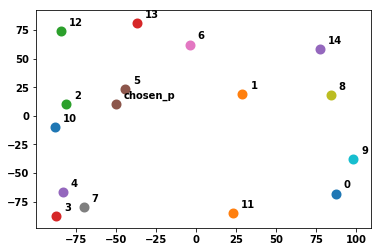

In [208]:
draw_figure(point_dict)

In [11]:
from functools import wraps
def momo_inner(func_two):
    distance_two = {}
    @wraps(func_two)
    def _inner_wraps_two(place1, place2,point_dict):
        if (place1, place2) in distance_two:
            result = distance_two[(place1, place2)]
        elif (place2, place1) in distance_two:
            result = distance_two[(place2, place1)]  
        else:
            result = func_two(place1, place2,point_dict)
            distance_two[(place1, place2)] = result
        return result
    return _inner_wraps_two

In [109]:
#distance by geo
import math
@momo_inner
def get_distance(place1, place2,point_dict):
    lat1,lon1 = point_dict[place1]
    lat2,lon2 = point_dict[place2]
    radius = 6371
    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c
    return d

In [30]:
def memo_2(func):
    distance = {}
    @wraps(func)
    def _inner_wraps_2(start,left_set):
        if (start,tuple(left_set)) in distance:
            result = distance[(start,tuple(left_set))]
        else:
            result = func(start,left_set)
            distance[(start,tuple(left_set))] = result
        return result
    return _inner_wraps_2

In [60]:
solutions = {}
@memo_2
def map_2(start,left_set):
    if len(left_set) == 0:
        return 0
    else:
        min_distance,min_routes = min([(get_distance(start, i,point_dict)+
                                        map_2(i,left_set-{i}),(i,tuple(left_set-{i})))
                                       for i in left_set],key = lambda x:x[0])
    solutions[(start,tuple(left_set))] = min_routes
    return min_distance

In [102]:
def parse_solution(new_taget, solutions,start_route):
    start_route += [new_taget[0]]
    if new_taget not in list(solutions.keys()):
        return start_route
    else:
        new_taget = solutions[new_taget]
        return parse_solution(new_taget, solutions,start_route)

In [112]:
def search_start(start,left_set,solutions):
    start_route = []
    for key_i,values_i in solutions.items():
        if key_i[0]==start and left_set == set(key_i[1]):
            start_route = []
            routes_end= parse_solution(key_i, solutions,start_route)
            return routes_end
            

In [62]:
map_2(8,{1,2,5,7,9})

23369.637003867167

In [106]:
search_start(8,{1,2,5,7,9},solutions)

yes


[8, 9, 1, 5, 2, 7]

In [94]:
point_dict['chosen_p']= (-50, 10)

In [97]:
map_2('chosen_p',set(range(0,15)))

42445.97281849627

In [126]:
route_direction = search_start('chosen_p',set(range(0,15)),solutions)

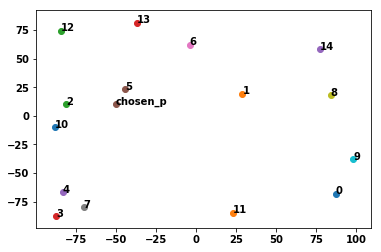

In [127]:
draw_figure(point_dict)

In [217]:
import matplotlib.pyplot as plt
def connect_route(point_dict,route_direction):
    draw_figure(point_dict)
    x = []
    y = []
    for i in list(range(0,len(route_direction))):
        point_1 = point_dict[route_direction[i]]
        x += [point_1[0]]
        y += [point_1[1]]
    x = np.array(x)
    y = np.array(y)
    plt.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1,color ='k')
    #plt.plot(x,y)

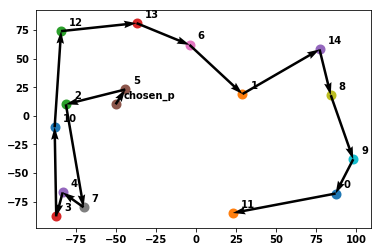

In [218]:
connect_route(point_dict,route_direction)

# Other try , not used

In [251]:
def parse_solution(target_set, solutions):
    if len(target_set) in [0,1]:
        return [target_set]
    elif len(target_set) == 2:
        return [target_set]
    else:
        set1,set2, connect = solutions[target_set][0][0],solutions[target_set][0][1],solutions[target_set][1]
        return parse_solution(set1, solutions) + parse_solution(set2, solutions)+[connect]

In [237]:
def get(parse_solution):
    get_one = tuple(i for i in road_connection4 if len(i) ==1)
    return get_one[0]

In [270]:
solutions = {}
visited_connect = set()
@memo
def map(palces_set):
    global solutions,visited_connect
    if len(palces_set) == 1: 
        min_distance = 0
        solutions[palces_set] = 'this is end'
    elif len(palces_set)==2:
        min_distance = get_distance(palces_set[0], palces_set[1],point_dict)
        solutions[palces_set] = 'this is only two places'
    else:
        candidates = cut_all_candidates(palces_set)
        all_diatnace = []
        for place_set_can in candidates:
            if set(place_set_can[0]) <= visited_connect or place_set_can[1] <= visited_connect:
                min_distance = 0
            else:
                min_connected_two = min_twopoint(place_set_can,point_dict,visited_connect)
                sum_list = sum([map(place_set_can[0]),min_connected_two[0] ,map(place_set_can[1])])
                infor_need = (sum_list,place_set_can,min_connected_two[1])
                all_diatnace += [infor_need]
            min_distance,min_routes,connects = min(all_diatnace,key = lambda x:x[0])
            solutions[palces_set] = (min_routes,connects)
        for i in connects:
            visited_connect.add(i)
        print('connects',connects)
        print(visited_connect)
    return min_distance

In [211]:
start = get(road_connection4)
visited_set = [start]
def order_place(start,parse_solution):  
    global visited_set
    start_place = start[0]
    for i in parse_solution:
        if i in visited_set:
            continue
        else:
            if start_place in i:
                new_start = tuple(m for m in i if m not in start)
                print(new_start)
                visited_set += [i]
                return order_place(new_start,parse_solution)
 

In [108]:
def min_twopoint(place_set,point_dict,visited_connect):
    dis_s = []
    for place1 in place_set[0]:
        for place2 in place_set[1]:
            if place1 not in visited_connect and place2 not in visited_connect:
                print('not in')
                dis_s += [(map((place1,place2)),(place1,place2))]
            else:
                continue
    return min(dis_s, key= lambda x:x[0])

In [10]:
import itertools
def left_part(single_set,place_set): return tuple(i for i in place_set if i not in single_set)
def cut_all_candidates(place_set): 
    cans = list(itertools.combinations(list(place_set), 2))
    cans_set = [(i,left_part(i,place_set)) for i in cans]
    return cans_set

In [14]:
def memo(func):
    distance = {}
    @wraps(func)
    def _inner_wraps(start):
        if tuple(start) in distance:
            result = distance[tuple(start)]
        else:
            result = func(start)
            distance[tuple(start)] = result
        return result
    return _inner_wraps

In [ ]:
palces = set(list(point_dict.keys()))
solutions = {}
@memo
def map(start):
    global palces
    start_last = start[-1]
    place_left = palces-set(start)
    if len(place_left)==0:
        return 0
    else:
        min_distance,min_routes = min([(get_distance(start_last, i,point_dict)+
                                        map(start+[i]),start+[i])
                                       for i in  place_left],key = lambda x:x[0])
    solutions[tuple(start)] = min_routes
    return min_distance

In [41]:
def parse_solution(target_start, solutions):
    if tuple(target_start) not in list(solutions.keys()):
        return target_start
    else:
        new_taget = solutions[tuple(target_start)]
        print(new_taget)
        return parse_solution(new_taget, solutions)